In [1]:

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
from datetime import timedelta

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb
from sklearn.metrics import f1_score



In [2]:
raw_data = pd.read_csv('../Data/santander-customer-transaction-prediction/train.csv')
raw_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
raw_data.dtypes.value_counts()

float64    200
object       1
int64        1
Name: count, dtype: int64

In [4]:
raw_data['target'].dtype

dtype('int64')

In [5]:
raw_data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
raw_data.drop('ID_code', axis=1, inplace=True)

In [8]:
x = raw_data.drop(['target'], axis=1)
y = raw_data['target']

In [9]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
y_train.value_counts()

target
0    144019
1     15981
Name: count, dtype: int64

In [11]:
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)


In [12]:
roc_curves = []

def plot_roc_curve(y_test, y_proba, model_name):
    global roc_curves
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_curves.append((fpr, tpr, roc_auc, model_name))
    plt.figure()
    for fpr, tpr, roc_auc, model_name in roc_curves:
        plt.plot(fpr, tpr, label=f'{model_name}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

In [13]:
auc_scores =[]
def plot_auc_bar_chart(auc_score, model_name):
    global auc_scores
    auc_scores.append((auc_score, model_name))
    models = [model for _, model in auc_scores]
    scores = [score for score, _ in auc_scores]

    plt.figure(figsize=(10, 10))
    plt.bar(models, scores, color='navy')
    plt.xlabel('Models')
    plt.ylabel('AUC Score')
    plt.title('AUC Scores for Different Models')
    plt.ylim(0, 1)  # AUC scores range from 0 to 1
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

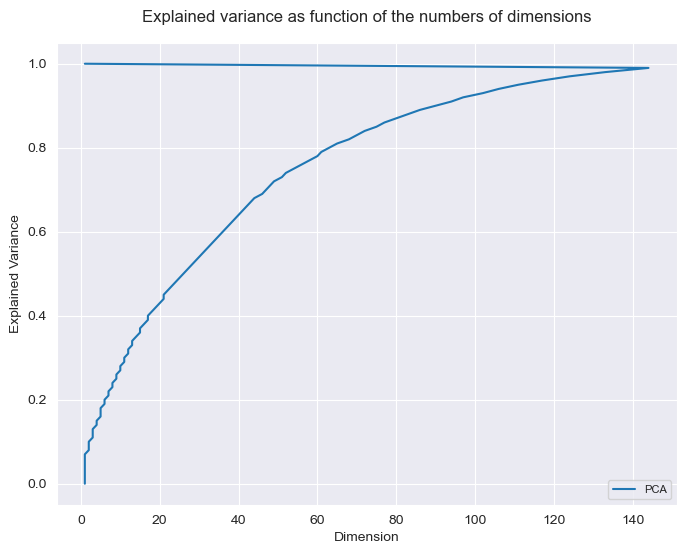

In [14]:
pca = PCA(random_state=42)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
var_ratio_sum = np.cumsum(pca.explained_variance_ratio_)
threshold = np.arange(0.0, 1.01, 0.01, )
dimension = lambda threshold: np.argmax(var_ratio_sum>=threshold) + 1


plt.figure(figsize=(8, 6))
plt.plot([dimension(x) for x in threshold],threshold, label = 'PCA')
plt.title('Explained variance as function of the numbers of dimensions', pad=15)
plt.ylabel('Explained Variance')
plt.xlabel('Dimension')
plt.legend(loc="lower right", fontsize=8)
plt.show

Confusion Matrix:
 [[28090  7793]
 [  946  3171]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87     35883
           1       0.29      0.77      0.42      4117

    accuracy                           0.78     40000
   macro avg       0.63      0.78      0.64     40000
weighted avg       0.90      0.78      0.82     40000



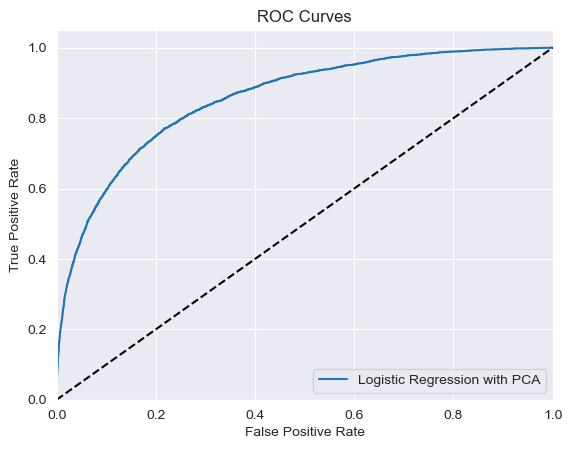

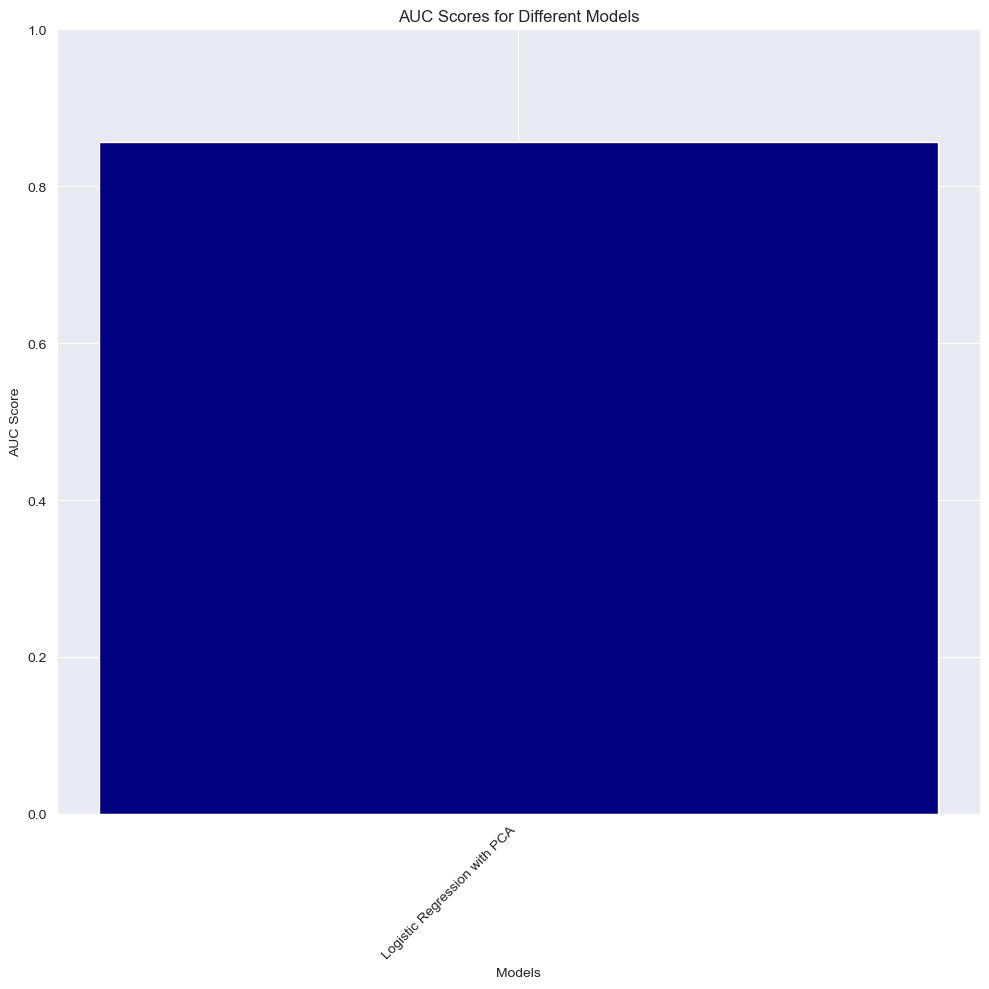

In [15]:
from sklearn.metrics import classification_report
#logistic regression with pca

logisticRegression = LogisticRegression(random_state=42, solver='lbfgs',
    n_jobs=-1,class_weight='balanced')
logisticRegression.fit(x_train_pca, y_train)

log_y_pre = logisticRegression.predict(x_test_pca)
log_y_proba = logisticRegression.predict_proba(x_test_pca)[:, 1]
log_confusion_matrix = confusion_matrix(y_test, log_y_pre)
log_accuracy = accuracy_score(y_test, log_y_pre)
log_f1_score = f1_score(y_test, log_y_pre, average='weighted')
log_pre = precision_score(y_test, log_y_pre, average='weighted')
log_recall = recall_score(y_test, log_y_pre, average='weighted')
log_roc_auc = roc_auc_score(y_test, log_y_proba)

print("Confusion Matrix:\n", log_confusion_matrix)
print("Classification Report:\n", classification_report(y_test, log_y_pre))
plot_roc_curve(y_test, log_y_proba, 'Logistic Regression with PCA')
plot_auc_bar_chart(log_roc_auc, 'Logistic Regression with PCA')
 


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Confusion Matrix:
 [[28090  7793]
 [  946  3171]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     35883
           1       0.09      0.03      0.04      4117

    accuracy                           0.87     40000
   macro avg       0.49      0.50      0.49     40000
weighted avg       0.81      0.87      0.84     40000



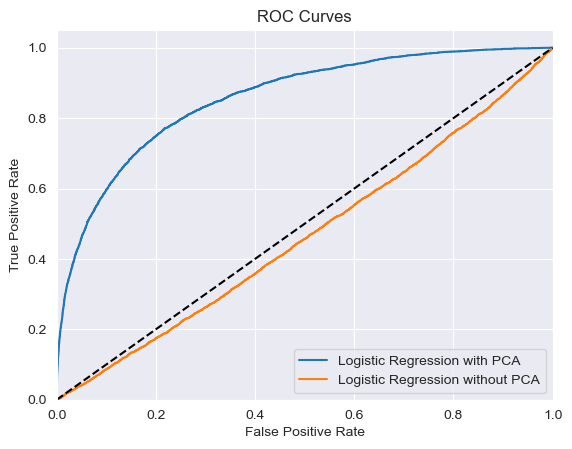

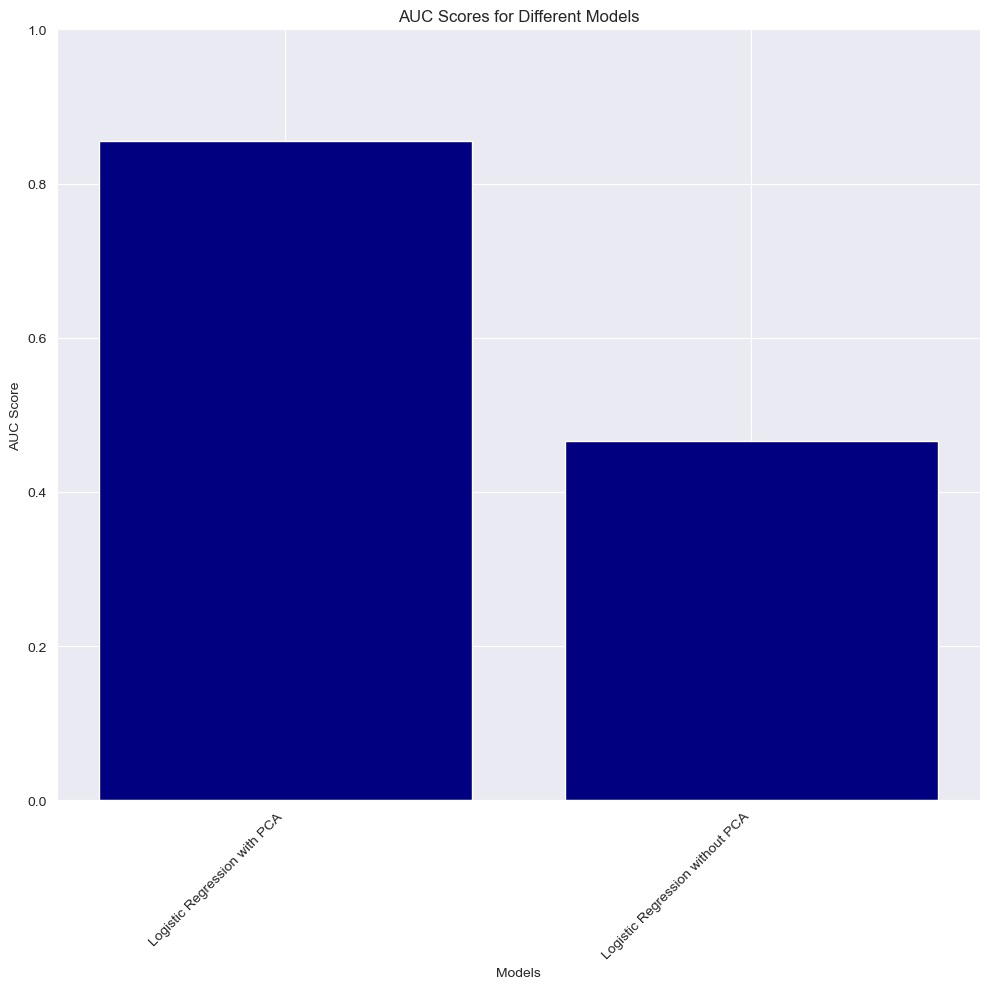

In [16]:
from sklearn.metrics import classification_report
#logistic regression without pca

logisticRegression = LogisticRegression(random_state=42, solver='lbfgs',
    n_jobs=-1,class_weight='balanced')
logisticRegression.fit(x_train_pca, y_train)

log_y_pre_wopca = logisticRegression.predict(x_test)
log_y_proba_wopca = logisticRegression.predict_proba(x_test)[:, 1]
log_confusion_matrix_wopca = confusion_matrix(y_test, log_y_pre)
log_accuracy_wopca = accuracy_score(y_test, log_y_pre)
log_f1_score_wopca = f1_score(y_test, log_y_pre, average='weighted')
log_pre_wopca = precision_score(y_test, log_y_pre, average='weighted')
log_recall_wopca = recall_score(y_test, log_y_pre, average='weighted')
log_roc_auc_wopca = roc_auc_score(y_test, log_y_proba_wopca)

print("Confusion Matrix:\n", log_confusion_matrix_wopca)
print("Classification Report:\n", classification_report(y_test, log_y_pre_wopca))
plot_roc_curve(y_test, log_y_proba_wopca, 'Logistic Regression without PCA')
plot_auc_bar_chart(log_roc_auc_wopca, 'Logistic Regression without PCA')
 


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SVM confusion matrix: 
 [[35008   875]
 [ 2762  1355]]
SVM ROC-AUC:  0.8469550504093908
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     35883
           1       0.61      0.33      0.43      4117

    accuracy                           0.91     40000
   macro avg       0.77      0.65      0.69     40000
weighted avg       0.89      0.91      0.90     40000



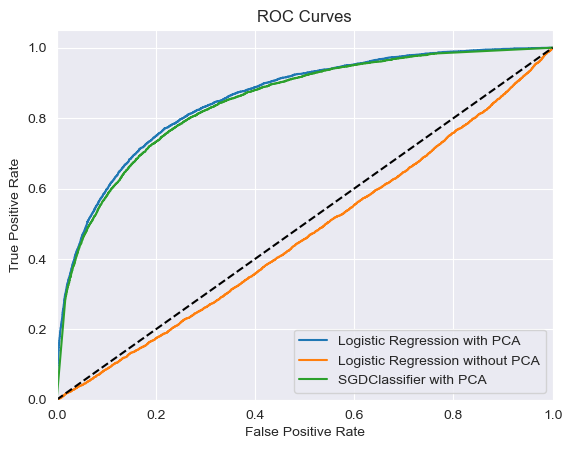

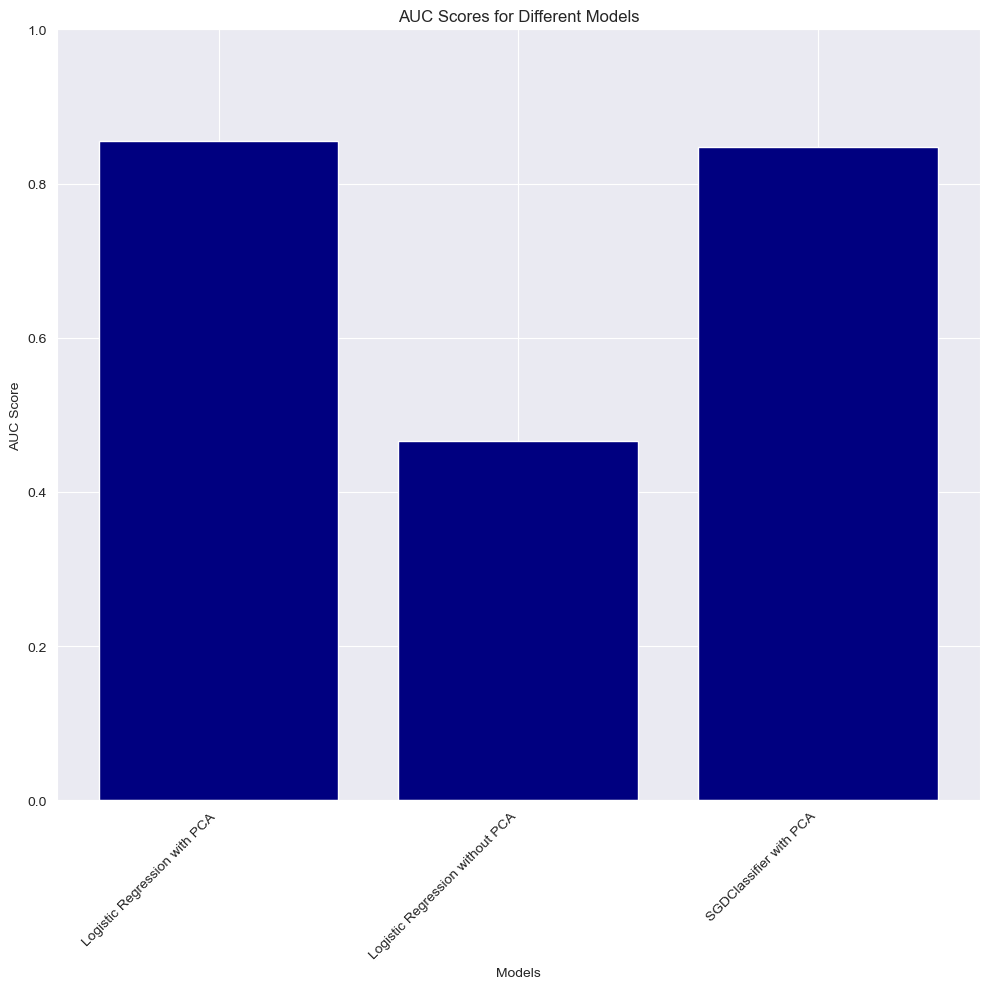

In [17]:
#SDGClassifier with PCA
sgd_clf = SGDClassifier( loss='log_loss', tol =0.001, random_state=42)
sgd_clf.fit(x_train_pca, y_train)
sgd_clf_y_pred = sgd_clf.predict(x_test_pca)

svm_confusion_matrix = confusion_matrix(y_test, sgd_clf_y_pred)
svm_accuracy = accuracy_score(y_test, sgd_clf_y_pred)
svm_precision = precision_score(y_test, sgd_clf_y_pred)
svm_recall = recall_score(y_test, sgd_clf_y_pred)
svm_f1 = f1_score(y_test, sgd_clf_y_pred)
svm_y_proba = sgd_clf.predict_proba(x_test_pca)[:,1]
svm_roc_auc = roc_auc_score(y_test, svm_y_proba)

print("SVM confusion matrix: \n", svm_confusion_matrix)  
print("SVM ROC-AUC: ", svm_roc_auc)
print(classification_report(y_test, sgd_clf_y_pred))
plot_roc_curve(y_test, svm_y_proba, 'SGDClassifier with PCA')
plot_auc_bar_chart(svm_roc_auc, 'SGDClassifier with PCA')


SVM confusion matrix: 
 [[34982   901]
 [ 2859  1258]]
SVM ROC-AUC:  0.8407277027935045
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     35883
           1       0.58      0.31      0.40      4117

    accuracy                           0.91     40000
   macro avg       0.75      0.64      0.67     40000
weighted avg       0.89      0.91      0.89     40000



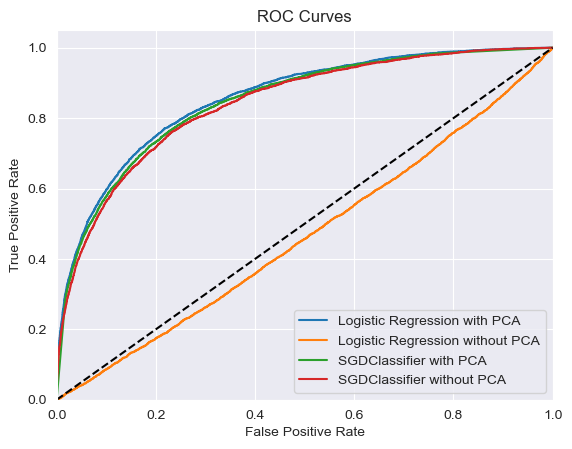

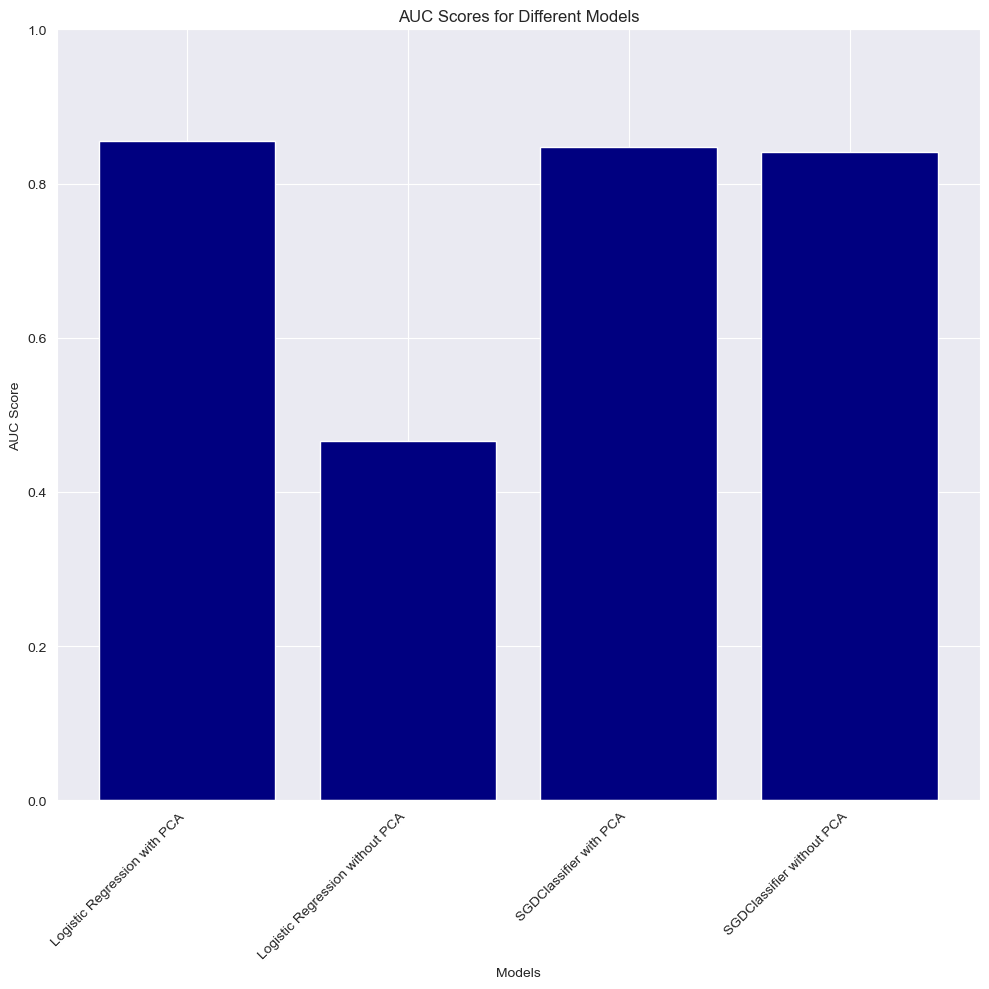

In [18]:
#SDGClassifier without PCA
sgd_clf = SGDClassifier( loss='log_loss', tol =0.001, random_state=0)
sgd_clf.fit(x_train, y_train)
sgd_clf_y_pred_wopca = sgd_clf.predict(x_test)

svm_confusion_matrix_wopca = confusion_matrix(y_test, sgd_clf_y_pred_wopca)
svm_accuracy_wopca = accuracy_score(y_test, sgd_clf_y_pred_wopca)
svm_precision_wopca = precision_score(y_test, sgd_clf_y_pred_wopca)
svm_recall_wopca = recall_score(y_test, sgd_clf_y_pred_wopca)
svm_f1_wopca = f1_score(y_test, sgd_clf_y_pred_wopca)
svm_y_proba_wopca = sgd_clf.predict_proba(x_test)[:,1]
svm_roc_auc_wopca = roc_auc_score(y_test, svm_y_proba_wopca)

print("SVM confusion matrix: \n", svm_confusion_matrix_wopca)  
print("SVM ROC-AUC: ", svm_roc_auc_wopca)
print(classification_report(y_test, sgd_clf_y_pred_wopca))
plot_roc_curve(y_test, svm_y_proba_wopca, 'SGDClassifier without PCA')
plot_auc_bar_chart(svm_roc_auc_wopca, 'SGDClassifier without PCA')


Random Forest confusion matrix: 
 [[31231  4652]
 [ 1828  2289]]
Random Forest ROC-AUC:  0.8120025618845411
              precision    recall  f1-score   support

           0       0.94      0.87      0.91     35883
           1       0.33      0.56      0.41      4117

    accuracy                           0.84     40000
   macro avg       0.64      0.71      0.66     40000
weighted avg       0.88      0.84      0.86     40000



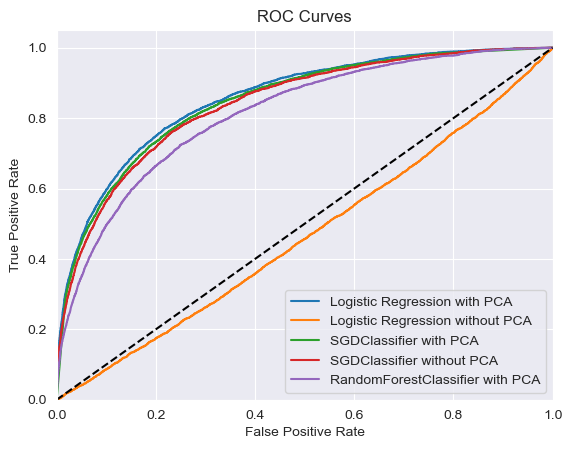

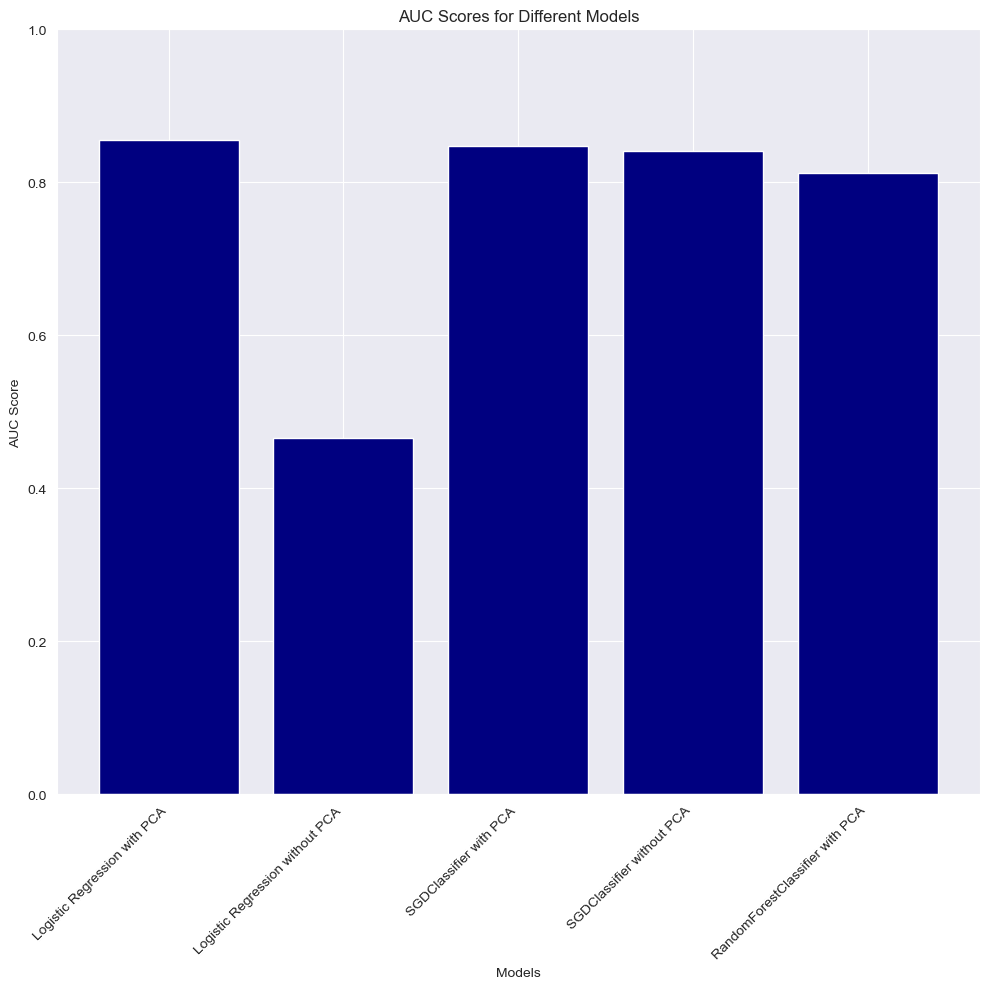

In [19]:
#RandomForest with PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, classification_report
)
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Random Forest Classifier
randomForestClassifier = RandomForestClassifier(
    random_state=40,
    max_features='log2',
    max_depth=10,
    n_jobs=-1,
    n_estimators=300,
    class_weight={0: 1, 1: 10}  
)
randomForestClassifier.fit(x_train_pca, y_train)
rf_y_pred = randomForestClassifier.predict(x_test_pca)
rf_y_proba = randomForestClassifier.predict_proba(x_test_pca)[:, 1]

# Metrics
rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
roc_auc = roc_auc_score(y_test, rf_y_proba)

print("Random Forest confusion matrix: \n", rf_confusion_matrix)
print("Random Forest ROC-AUC: ", roc_auc)
print(classification_report(y_test, rf_y_pred))

# ROC Curve
plot_roc_curve(y_test, rf_y_proba, 'RandomForestClassifier with PCA')
plot_auc_bar_chart(roc_auc, 'RandomForestClassifier with PCA')



Random Forest confusion matrix: 
 [[30853  5030]
 [ 1641  2476]]
Random Forest ROC-AUC:  0.8120025618845411
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     35883
           1       0.33      0.60      0.43      4117

    accuracy                           0.83     40000
   macro avg       0.64      0.73      0.66     40000
weighted avg       0.89      0.83      0.85     40000



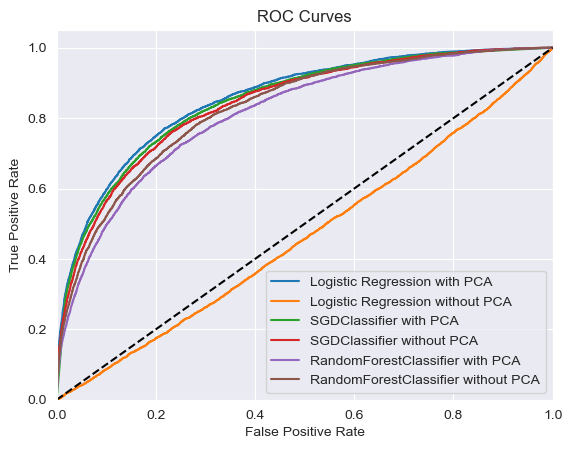

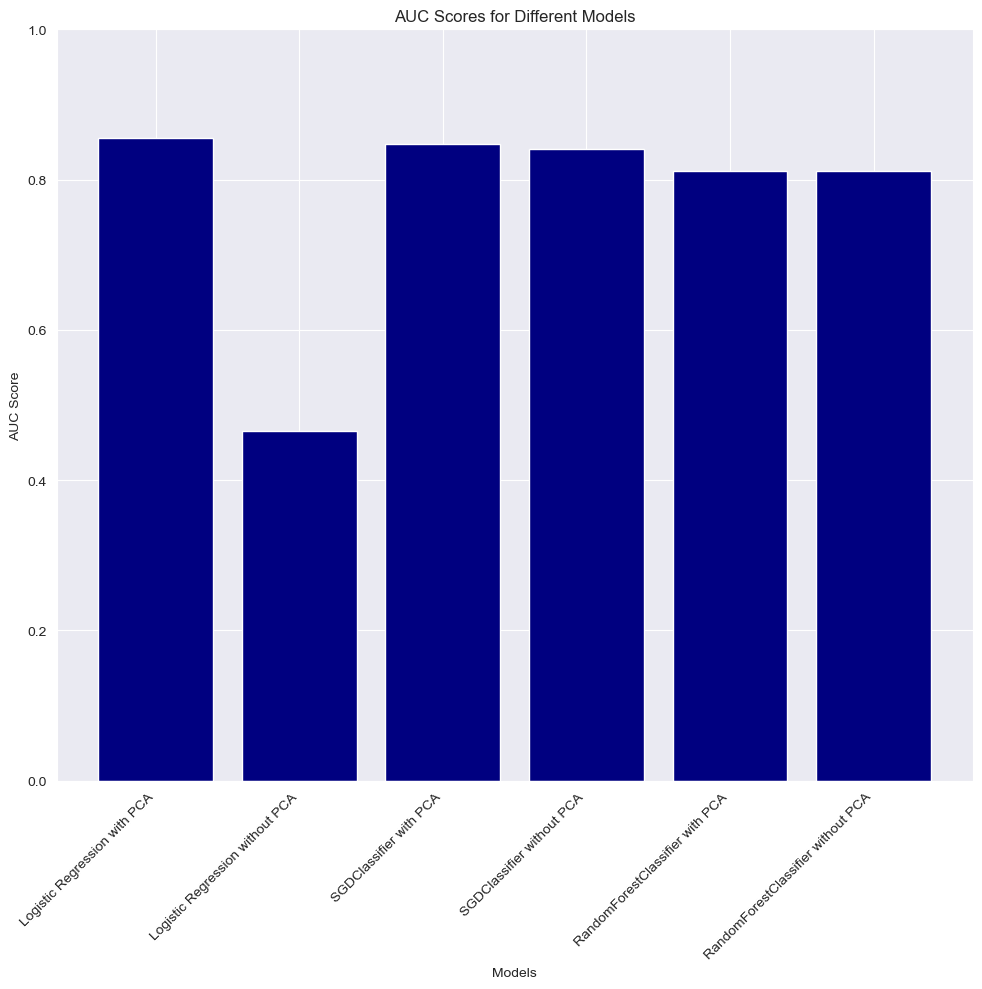

In [20]:
#RandomForest without PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, classification_report
)
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Random Forest Classifier
randomForestClassifier = RandomForestClassifier(
    random_state=0,
    max_features='log2',
    max_depth=10,
    n_jobs=-1,
    n_estimators=300,
    class_weight={0: 1, 1: 10}  
)
randomForestClassifier.fit(x_train, y_train)
rf_y_pred_wopca = randomForestClassifier.predict(x_test)
rf_y_proba_wopca = randomForestClassifier.predict_proba(x_test)[:, 1]

# Metrics
rf_confusion_matrix_wopca = confusion_matrix(y_test, rf_y_pred_wopca)
rf_accuracy_wopca = accuracy_score(y_test, rf_y_pred_wopca)
rf_precision_wopca = precision_score(y_test, rf_y_pred_wopca)
rf_recall_wopca = recall_score(y_test, rf_y_pred_wopca)
rf_f1_wopca = f1_score(y_test, rf_y_pred_wopca)
roc_auc_wopca = roc_auc_score(y_test, rf_y_proba)

print("Random Forest confusion matrix: \n", rf_confusion_matrix_wopca)
print("Random Forest ROC-AUC: ", roc_auc_wopca)
print(classification_report(y_test, rf_y_pred_wopca))

# ROC Curve
plot_roc_curve(y_test, rf_y_proba_wopca, 'RandomForestClassifier without PCA')
plot_auc_bar_chart(roc_auc_wopca, 'RandomForestClassifier without PCA')



In [21]:
importances = randomForestClassifier.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 81 (0.043222)
2. feature 12 (0.029226)
3. feature 139 (0.027150)
4. feature 110 (0.026028)
5. feature 53 (0.022263)
6. feature 26 (0.021801)
7. feature 146 (0.021158)
8. feature 6 (0.020747)
9. feature 174 (0.019556)
10. feature 22 (0.016967)
11. feature 76 (0.016235)
12. feature 166 (0.015529)
13. feature 99 (0.015364)
14. feature 109 (0.015275)
15. feature 148 (0.014692)
16. feature 21 (0.014327)
17. feature 190 (0.014050)
18. feature 198 (0.013373)
19. feature 133 (0.012490)
20. feature 179 (0.012255)
21. feature 165 (0.012234)
22. feature 80 (0.012109)
23. feature 44 (0.011852)
24. feature 34 (0.011485)
25. feature 2 (0.011397)
26. feature 0 (0.011172)
27. feature 78 (0.010388)
28. feature 13 (0.010268)
29. feature 40 (0.009513)
30. feature 1 (0.009351)
31. feature 164 (0.009132)
32. feature 108 (0.008483)
33. feature 170 (0.008439)
34. feature 115 (0.008080)
35. feature 92 (0.007810)
36. feature 191 (0.007622)
37. feature 33 (0.007416)
38. feature 154 (

In [22]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

stacking_clf = StackingClassifier(
    estimators=[('lr', LogisticRegression(random_state=41, n_jobs = -1)),
                ('rf', RandomForestClassifier(random_state=41, n_jobs = -1)),
                ('sgd',SGDClassifier(random_state=41, n_jobs = -1)),
                ('xgb', XGBClassifier(booster='gbtree',random_state=41))], final_estimator=RandomForestClassifier(random_state=43, n_jobs = -1),cv=3)
stacking_clf.fit(x_train_pca, y_train)
stacking_clf_y_ped = stacking_clf.predict(x_test_pca)

stacking_clf_confusion_matrix = confusion_matrix(y_test, stacking_clf_y_ped)
stacking_clf_accuracy = accuracy_score(y_test, stacking_clf_y_ped)
stacking_clf_precision = precision_score(y_test, stacking_clf_y_ped)
stacking_clf_recall = recall_score(y_test, stacking_clf_y_ped)
stacking_clf_f1 = f1_score(y_test, stacking_clf_y_ped)
stacking_clf_y_proba = randomForestClassifier.predict_proba(x_test_pca)[:,1]
stacking_clf_roc_auc = roc_auc_score(y_test, xgbrf_y_proba)

print("rf confusion matrix: \n", rf_confusion_matrix)
print("rf accuracy: ", stacking_clf_accuracy)
print("rf precision: ", stacking_clf_precision)
print("rf recall: ", stacking_clf_recall)
print("rf f1: ", stacking_clf_f1)
print("rf ROC-AUC: ", stacking_clf_roc_auc)
print(classification_report(y_test, stacking_clf_y_ped))
plot_roc_curve(y_test, stacking_clf_y_proba, 'StackingClassifier')
plot_auc_bar_chart(stacking_clf_roc_auc, 'StackingClassifier')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:4

NameError: name 'xgbrf_y_proba' is not defined